Rou Zhang 7050809338

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import os
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
column=['variance','skewness','curtosis' ,'entropy','label']
path='/Users/zhangrou/Desktop/courses/INF552/HW4/data_banknote_authentication.csv'
f=pd.read_csv(path,names=column)
train_df, test_df = train_test_split(f, test_size=472)

In [3]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
import numpy as np 
import bottleneck
import heapq
result_score=list()
parameters={'C':[0.01,1,10,50]}
for i in range(50):
    train_df=train_df.sample(frac = 1)
    for j in range (90):
        svc = LinearSVC(penalty='l1',dual=False)
        end=(j+1)*10
        if (j==0):
            train_data=train_df[:end]
            while(True):
                if(len(train_data[train_data['label']==1])<2 or len(train_data[train_data['label']==0])<2):
                    train_df=train_df.sample(frac = 1)
                    train_data=train_df[:end]
                else :
                    break
            print '*********'
            clf = GridSearchCV(svc, parameters,cv=LeaveOneOut())
            #print '&&&&'
        else:
            train_data=train_df[:end]
            clf = GridSearchCV(svc, parameters,cv=10)
        x=train_data.iloc[:,:4]
        y=train_data.iloc[:,4]
        clf.fit(x,y)
        params=clf.best_params_ 
        best_c=params['C']
        best_svc = LinearSVC(penalty='l1',dual=False,C=best_c)
        best_svc.fit(x,y)
        max_score=best_svc.score(test_df.iloc[:,:4],test_df.iloc[:,4])
        result_score.append(max_score)
    print i
passive_test_error=np.array(result_score).reshape(50,90)
print passive_test_error




*********


/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0
*********


/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


1
*********


/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


2
*********
3
*********
4
*********


/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


5
*********
6
*********
7
*********
8
*********
9
*********
10
*********


/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


11
*********
12
*********
13
*********
14
*********
15
*********
16
*********
17
*********
18
*********
19
*********
20
*********
21
*********
22
*********
23
*********
24
*********
25
*********
26
*********
27
*********
28
*********
29
*********
30
*********
31
*********
32
*********
33
*********
34
*********
35
*********
36
*********
37
*********
38
*********
39
*********
40
*********
41
*********
42
*********
43
*********
44
*********
45
*********
46
*********
47
*********
48
*********
49
[[0.90042373 0.90466102 0.98940678 ... 0.99364407 0.99364407 0.99364407]
 [0.82415254 0.96398305 0.98940678 ... 0.99152542 0.99152542 0.99364407]
 [0.84322034 0.89618644 0.94915254 ... 0.99364407 0.99364407 0.99364407]
 ...
 [0.81355932 0.85381356 0.97881356 ... 0.99364407 0.99364407 0.99364407]
 [0.9279661  0.95762712 0.95974576 ... 0.99364407 0.99364407 0.99364407]
 [0.6970339  0.96822034 0.96398305 ... 0.99364407 0.99364407 0.99364407]]


In [6]:
print 1-passive_test_error

[[0.09957627 0.09533898 0.01059322 ... 0.00635593 0.00635593 0.00635593]
 [0.17584746 0.03601695 0.01059322 ... 0.00847458 0.00847458 0.00635593]
 [0.15677966 0.10381356 0.05084746 ... 0.00635593 0.00635593 0.00635593]
 ...
 [0.18644068 0.14618644 0.02118644 ... 0.00635593 0.00635593 0.00635593]
 [0.0720339  0.04237288 0.04025424 ... 0.00635593 0.00635593 0.00635593]
 [0.3029661  0.03177966 0.03601695 ... 0.00635593 0.00635593 0.00635593]]


b)i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.1 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.


In this step, I used a two-layer loop. The outer loop controls 50 times repeated procedure. And the inner loop controls 90 times randomly selected data points from 10 ,20,30..900. For each time, I used GridSearchCV() to find the best C, and then used the best C we got to train our model LinearSVC(penalty='l1',dual=False,C=best_c) and got test error on test set.
Finally , we got a 50 * 90 matrix of test error. The result is above.


In [7]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
import numpy as np 
import bottleneck
import heapq
train=train_df
result_score=list()
parameters={'C':[0.01,1,10,50]}
for i in range(50):
    train_data=pd.DataFrame()
    train_df=train.sample(frac = 1)
    train_x=train_df.iloc[:,:4]
    for j in range (90):
        svc = LinearSVC(penalty='l1',dual=False)
        if (j==0):
            num=train_df[:10]
            while(True):
                if(len(num[num['label']==1])<2 or len(num[num['label']==0])<2):
                    train_df=train_df.sample(frac = 1)
                    num=train_df[:10]
                else :
                    break
            index=num.index
            print index
            train_data=pd.concat([train_data,num],axis=0)
            train_x.drop(index,axis=0,inplace=True)
            train_df.drop(index,axis=0,inplace=True)
            clf = GridSearchCV(svc, parameters,cv=LeaveOneOut())
            print '&&&&&&&'
        else:
            distance=pd.DataFrame(abs(clf.decision_function(train_x)))
            print distance[:1]
            distance.columns=['distance']
            distance.index=train_x.index
            train_df=pd.concat([train_df,distance],axis=1)
            train_df.sort_values(by="distance",axis=0,ascending = True)
            num=train_df[:10]
            index=num.index
            train_data=pd.concat([train_data,num.iloc[:,:5]],axis=0)
            train_df.drop('distance',axis=1,inplace=True)
            train_x.drop(index,axis=0,inplace=True)
            train_df.drop(index,axis=0,inplace=True)
            clf = GridSearchCV(svc, parameters,cv=10)
        x=train_data.iloc[:,:4]
        y=train_data.iloc[:,4]
        #print x.shape
        #print y.shape
        clf.fit(x,y)
        params=clf.best_params_ 
        best_c=params['C']
        #print '*************'
        best_svc = LinearSVC(penalty='l1',dual=False,C=best_c)
        best_svc.fit(x,y)
        max_score=best_svc.score(test_df.iloc[:,:4],test_df.iloc[:,4])
        #print '***************'
        result_score.append(max_score)
        print i,j
active_test_error=np.array(result_score).reshape(50,90)
print active_test_error
        



Int64Index([345, 1274, 1107, 36, 1286, 3, 1171, 149, 743, 457], dtype='int64')
&&&&&&&
0 0
     0
0  0.0
0 1
          0
0  1.025343
0 2
         0
0  0.08369
0 3
          0
0  3.833153
0 4
          0
0  2.549169
0 5
          0
0  3.627089
0 6
          0
0  1.068045
0 7
          0
0  4.329881
0 8
          0
0  2.723014
0 9
          0
0  4.258004
0 10
          0
0  5.525017
0 11
          0
0  6.689594
0 12
          0
0  5.159004
0 13
          0
0  2.846978
0 14
          0
0  2.425301
0 15
          0
0  1.286532
0 16
          0
0  2.282879
0 17
          0
0  1.628356
0 18
          0
0  3.945906
0 19
         0
0  2.54268
0 20
          0
0  2.412399
0 21
          0
0  2.596493
0 22
          0
0  1.693875
0 23
          0
0  1.822048
0 24
         0
0  1.59712
0 25
         0
0  2.03624
0 26
          0
0  1.746933
0 27
          0
0  1.818545
0 28
          0
0  1.397906
0 29
          0
0  4.379624
0 30
        0
0  2.4573
0 31
          0
0  3.776368
0 32
          0


3 7
          0
0  2.710876
3 8
          0
0  0.932636
3 9
         0
0  1.50639
3 10
          0
0  2.732893
3 11
         0
0  2.67473
3 12
          0
0  0.581805
3 13
          0
0  12.02702
3 14
          0
0  9.215469
3 15
           0
0  14.186127
3 16
          0
0  9.356373
3 17
           0
0  12.710189
3 18
          0
0  6.842185
3 19
           0
0  11.715608
3 20
           0
0  11.310485
3 21
           0
0  13.639327
3 22
          0
0  0.699574
3 23
           0
0  11.876201
3 24
           0
0  16.288794
3 25
           0
0  21.006332
3 26
           0
0  22.568881
3 27
           0
0  16.745331
3 28
          0
0  4.239497
3 29
          0
0  5.629106
3 30
          0
0  8.889615
3 31
          0
0  4.062312
3 32
           0
0  15.844148
3 33
          0
0  3.966557
3 34
          0
0  5.744121
3 35
          0
0  8.089818
3 36
         0
0  5.43213
3 37
          0
0  2.667021
3 38
           0
0  12.640432
3 39
           0
0  15.007622
3 40
           0
0  15.55

6 13
          0
0  2.416827
6 14
          0
0  3.354891
6 15
          0
0  0.930608
6 16
         0
0  4.10753
6 17
          0
0  1.789053
6 18
         0
0  0.12325
6 19
          0
0  3.944164
6 20
          0
0  3.155017
6 21
          0
0  4.852614
6 22
          0
0  0.235903
6 23
          0
0  1.999759
6 24
          0
0  4.801021
6 25
          0
0  4.493124
6 26
          0
0  6.508485
6 27
          0
0  5.140431
6 28
          0
0  8.207275
6 29
          0
0  1.653027
6 30
          0
0  4.855493
6 31
          0
0  3.680499
6 32
           0
0  10.292197
6 33
          0
0  5.654598
6 34
          0
0  1.528125
6 35
          0
0  2.876863
6 36
           0
0  10.402446
6 37
          0
0  4.587565
6 38
          0
0  2.518406
6 39
          0
0  3.401013
6 40
          0
0  8.771817
6 41
          0
0  4.477675
6 42
          0
0  5.608484
6 43
          0
0  3.518422
6 44
          0
0  5.098097
6 45
          0
0  2.802979
6 46
         0
0  2.66258
6 47
          0

9 20
          0
0  0.665097
9 21
          0
0  2.979127
9 22
          0
0  4.555323
9 23
          0
0  1.930593
9 24
          0
0  2.598442
9 25
          0
0  5.977504
9 26
           0
0  10.901785
9 27
          0
0  3.473172
9 28
         0
0  3.49713
9 29
          0
0  5.710077
9 30
          0
0  5.708845
9 31
          0
0  3.101193
9 32
          0
0  3.015101
9 33
          0
0  8.423645
9 34
          0
0  3.697805
9 35
          0
0  4.377505
9 36
          0
0  8.359696
9 37
          0
0  4.881859
9 38
          0
0  8.640048
9 39
           0
0  15.708255
9 40
           0
0  12.424756
9 41
          0
0  4.038421
9 42
       0
0  5.096
9 43
          0
0  3.398575
9 44
          0
0  3.760909
9 45
          0
0  5.474433
9 46
          0
0  2.766261
9 47
          0
0  4.912572
9 48
          0
0  1.521664
9 49
          0
0  4.930496
9 50
         0
0  0.22087
9 51
          0
0  2.935033
9 52
          0
0  1.701121
9 53
          0
0  5.877678
9 54
          0
0

12 22
          0
0  2.929237
12 23
         0
0  5.48552
12 24
          0
0  4.298638
12 25
          0
0  6.351771
12 26
          0
0  6.232404
12 27
         0
0  6.40726
12 28
          0
0  4.197987
12 29
          0
0  5.044644
12 30
          0
0  6.717382
12 31
          0
0  0.416176
12 32
          0
0  5.862241
12 33
         0
0  3.10495
12 34
         0
0  3.47105
12 35
          0
0  6.015352
12 36
          0
0  3.912556
12 37
          0
0  0.595329
12 38
          0
0  4.499745
12 39
           0
0  13.628186
12 40
          0
0  3.222993
12 41
          0
0  10.13813
12 42
          0
0  8.729827
12 43
          0
0  6.073988
12 44
          0
0  9.506621
12 45
        0
0  6.7044
12 46
          0
0  6.236746
12 47
          0
0  2.544613
12 48
          0
0  1.196154
12 49
           0
0  14.117404
12 50
           0
0  11.431038
12 51
          0
0  3.523807
12 52
           0
0  12.191873
12 53
          0
0  7.776421
12 54
          0
0  9.228115
12 55
        

15 21
          0
0  2.463987
15 22
          0
0  3.109963
15 23
          0
0  3.380029
15 24
        0
0  2.1452
15 25
          0
0  0.108413
15 26
          0
0  2.326667
15 27
          0
0  2.672784
15 28
          0
0  4.052519
15 29
         0
0  2.44554
15 30
          0
0  4.783472
15 31
          0
0  3.137555
15 32
          0
0  4.335679
15 33
         0
0  2.90494
15 34
          0
0  2.859576
15 35
         0
0  7.32815
15 36
          0
0  1.257747
15 37
          0
0  3.711781
15 38
           0
0  11.185572
15 39
          0
0  6.532006
15 40
          0
0  6.159403
15 41
          0
0  3.393643
15 42
          0
0  7.701658
15 43
          0
0  8.298648
15 44
          0
0  1.991119
15 45
          0
0  4.181403
15 46
          0
0  7.927455
15 47
          0
0  8.225291
15 48
           0
0  10.213576
15 49
           0
0  10.813083
15 50
          0
0  7.041974
15 51
          0
0  11.10208
15 52
          0
0  6.463847
15 53
           0
0  10.259751
15 54
      

18 19
          0
0  4.687603
18 20
          0
0  1.767132
18 21
           0
0  12.777207
18 22
         0
0  9.99548
18 23
          0
0  9.436857
18 24
         0
0  20.2953
18 25
         0
0  9.72372
18 26
         0
0  5.68257
18 27
           0
0  15.797716
18 28
          0
0  2.898429
18 29
          0
0  5.524677
18 30
          0
0  4.109277
18 31
          0
0  9.560327
18 32
          0
0  0.059143
18 33
         0
0  3.36408
18 34
          0
0  8.355303
18 35
          0
0  16.40247
18 36
          0
0  7.380425
18 37
          0
0  3.706506
18 38
          0
0  6.951527
18 39
          0
0  0.803221
18 40
          0
0  8.139733
18 41
           0
0  14.274199
18 42
          0
0  10.08962
18 43
          0
0  9.068405
18 44
           0
0  10.212626
18 45
          0
0  10.18717
18 46
          0
0  0.180433
18 47
          0
0  9.475557
18 48
           0
0  21.875634
18 49
           0
0  13.965624
18 50
           0
0  16.282725
18 51
          0
0  8.273059
18 52


21 19
          0
0  2.211502
21 20
          0
0  5.153831
21 21
         0
0  0.74129
21 22
          0
0  4.356693
21 23
          0
0  3.296213
21 24
          0
0  4.253858
21 25
          0
0  1.042451
21 26
          0
0  0.107848
21 27
          0
0  0.994206
21 28
          0
0  1.162781
21 29
          0
0  2.651291
21 30
         0
0  3.98213
21 31
          0
0  3.804741
21 32
          0
0  5.077337
21 33
          0
0  7.966115
21 34
          0
0  3.672389
21 35
          0
0  6.600568
21 36
          0
0  3.257405
21 37
          0
0  2.356846
21 38
          0
0  9.017937
21 39
          0
0  9.793914
21 40
           0
0  10.500273
21 41
          0
0  0.271004
21 42
          0
0  5.419334
21 43
          0
0  2.246238
21 44
          0
0  2.549991
21 45
          0
0  3.467395
21 46
          0
0  3.828766
21 47
          0
0  3.980561
21 48
          0
0  7.583789
21 49
          0
0  3.264681
21 50
          0
0  5.357158
21 51
          0
0  4.509002
21 52
      

24 18
          0
0  3.948845
24 19
          0
0  4.321796
24 20
          0
0  1.238145
24 21
          0
0  0.526303
24 22
          0
0  3.794574
24 23
          0
0  4.540194
24 24
          0
0  3.322357
24 25
          0
0  2.820466
24 26
          0
0  1.346114
24 27
          0
0  2.148972
24 28
         0
0  4.20434
24 29
          0
0  1.380251
24 30
          0
0  2.864796
24 31
          0
0  3.136874
24 32
          0
0  1.206145
24 33
          0
0  4.500386
24 34
          0
0  5.162914
24 35
         0
0  3.39749
24 36
         0
0  3.15911
24 37
          0
0  3.914131
24 38
          0
0  4.801008
24 39
          0
0  6.110025
24 40
         0
0  3.37189
24 41
          0
0  0.209225
24 42
         0
0  6.08819
24 43
          0
0  4.217931
24 44
          0
0  2.083185
24 45
          0
0  4.276104
24 46
         0
0  8.99453
24 47
          0
0  8.277435
24 48
          0
0  2.001833
24 49
          0
0  3.807272
24 50
          0
0  3.722324
24 51
          0
0  3

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


25 1
          0
0  2.030133
25 2
          0
0  0.258698
25 3
          0
0  2.306219
25 4
         0
0  4.96304
25 5
          0
0  1.002479
25 6
          0
0  2.478811
25 7
          0
0  1.540795
25 8
          0
0  1.809441
25 9
          0
0  1.816831
25 10
          0
0  3.563371
25 11
          0
0  4.071729
25 12
          0
0  3.886083
25 13
          0
0  0.055964
25 14
          0
0  4.571468
25 15
          0
0  3.331495
25 16
           0
0  11.372131
25 17
          0
0  13.22486
25 18
          0
0  6.373336
25 19
           0
0  18.000836
25 20
           0
0  14.178533
25 21
          0
0  6.291372
25 22
           0
0  10.332698
25 23
          0
0  0.742909
25 24
           0
0  17.556044
25 25
          0
0  15.72401
25 26
           0
0  13.181131
25 27
           0
0  17.436119
25 28
          0
0  0.574422
25 29
          0
0  9.442227
25 30
           0
0  15.872468
25 31
          0
0  0.560008
25 32
           0
0  19.862311
25 33
           0
0  14.401138
2

28 1
          0
0  0.916562
28 2
          0
0  0.727211
28 3
         0
0  0.87515
28 4
         0
0  3.17308
28 5
          0
0  6.200469
28 6
          0
0  5.810687
28 7
          0
0  1.724787
28 8
          0
0  1.622708
28 9
           0
0  11.282366
28 10
           0
0  13.755398
28 11
          0
0  5.367434
28 12
           0
0  10.008288
28 13
          0
0  5.630561
28 14
          0
0  4.247769
28 15
          0
0  1.492059
28 16
          0
0  5.970271
28 17
          0
0  9.976347
28 18
           0
0  14.184202
28 19
          0
0  4.942585
28 20
          0
0  6.505886
28 21
          0
0  4.030191
28 22
          0
0  5.138587
28 23
          0
0  2.421134
28 24
          0
0  1.230281
28 25
          0
0  2.330022
28 26
          0
0  1.888422
28 27
          0
0  1.827144
28 28
          0
0  1.531804
28 29
          0
0  1.796082
28 30
          0
0  3.204633
28 31
          0
0  5.308382
28 32
          0
0  7.220001
28 33
          0
0  3.443053
28 34
         

31 1
          0
0  2.026387
31 2
         0
0  2.37274
31 3
          0
0  0.721674
31 4
          0
0  2.633622
31 5
          0
0  1.310629
31 6
          0
0  0.959576
31 7
          0
0  2.627716
31 8
          0
0  1.970369
31 9
         0
0  1.58063
31 10
          0
0  4.047822
31 11
          0
0  4.575449
31 12
          0
0  3.845188
31 13
          0
0  0.422523
31 14
          0
0  2.221407
31 15
          0
0  4.311964
31 16
          0
0  4.963239
31 17
          0
0  2.885109
31 18
          0
0  2.321461
31 19
          0
0  5.176201
31 20
          0
0  4.752619
31 21
          0
0  2.138138
31 22
          0
0  4.201987
31 23
           0
0  14.698858
31 24
          0
0  0.881172
31 25
           0
0  14.964799
31 26
         0
0  3.11733
31 27
          0
0  0.155915
31 28
          0
0  0.616883
31 29
           0
0  11.229013
31 30
           0
0  10.072901
31 31
           0
0  12.995187
31 32
          0
0  8.502809
31 33
           0
0  14.612064
31 34
       

34 1
          0
0  2.191929
34 2
          0
0  1.848081
34 3
          0
0  1.633825
34 4
          0
0  1.195075
34 5
          0
0  1.284094
34 6
          0
0  8.741605
34 7
           0
0  13.943653
34 8
           0
0  12.476606
34 9
           0
0  13.410036
34 10
           0
0  13.347716
34 11
          0
0  2.758094
34 12
           0
0  17.490243
34 13
           0
0  12.909395
34 14
           0
0  18.618457
34 15
           0
0  12.223732
34 16
          0
0  6.621337
34 17
          0
0  9.463383
34 18
           0
0  10.947645
34 19
          0
0  5.032378
34 20
           0
0  10.026289
34 21
          0
0  2.796493
34 22
           0
0  11.658465
34 23
          0
0  4.344398
34 24
          0
0  17.28206
34 25
          0
0  3.887977
34 26
          0
0  3.586738
34 27
          0
0  6.776529
34 28
          0
0  4.283154
34 29
          0
0  5.145315
34 30
          0
0  2.355124
34 31
          0
0  2.852851
34 32
          0
0  5.195626
34 33
          0
0  4.3867

37 1
          0
0  1.941308
37 2
          0
0  1.290043
37 3
          0
0  2.984591
37 4
         0
0  0.93414
37 5
          0
0  2.854125
37 6
         0
0  3.52537
37 7
          0
0  2.563596
37 8
          0
0  2.007699
37 9
          0
0  2.652199
37 10
          0
0  3.592231
37 11
          0
0  1.050439
37 12
         0
0  3.70607
37 13
          0
0  3.909465
37 14
          0
0  4.537623
37 15
          0
0  3.722714
37 16
          0
0  3.495276
37 17
          0
0  3.288907
37 18
          0
0  3.197517
37 19
        0
0  3.5285
37 20
          0
0  5.942396
37 21
          0
0  4.309234
37 22
         0
0  2.46237
37 23
          0
0  3.156371
37 24
         0
0  4.48999
37 25
          0
0  5.316302
37 26
          0
0  3.350005
37 27
          0
0  1.126286
37 28
          0
0  3.933512
37 29
          0
0  4.503208
37 30
          0
0  2.133237
37 31
          0
0  0.753929
37 32
          0
0  5.119142
37 33
         0
0  1.95153
37 34
          0
0  2.408843
37 35

40 1
          0
0  2.991209
40 2
          0
0  2.179655
40 3
         0
0  2.75618
40 4
          0
0  0.239835
40 5
          0
0  2.991841
40 6
          0
0  2.131635
40 7
          0
0  0.582168
40 8
          0
0  0.842163
40 9
          0
0  0.284005
40 10
         0
0  0.82577
40 11
          0
0  0.463377
40 12
          0
0  5.849045
40 13
           0
0  10.307518
40 14
          0
0  3.493564
40 15
          0
0  3.660703
40 16
          0
0  2.665193
40 17
           0
0  19.422451
40 18
           0
0  13.502126
40 19
          0
0  1.113761
40 20
          0
0  4.942252
40 21
          0
0  3.750197
40 22
        0
0  2.3267
40 23
          0
0  6.133552
40 24
          0
0  5.477582
40 25
          0
0  2.202831
40 26
          0
0  4.060149
40 27
          0
0  5.850463
40 28
          0
0  2.537193
40 29
          0
0  0.778686
40 30
          0
0  3.747398
40 31
          0
0  3.336423
40 32
          0
0  4.378086
40 33
          0
0  4.636552
40 34
          0
0  

43 1
          0
0  2.921212
43 2
          0
0  1.770756
43 3
         0
0  1.98418
43 4
          0
0  1.718599
43 5
          0
0  4.783283
43 6
         0
0  3.05736
43 7
          0
0  6.552051
43 8
          0
0  1.119179
43 9
          0
0  5.663222
43 10
          0
0  2.030407
43 11
         0
0  1.65719
43 12
          0
0  2.816871
43 13
          0
0  1.245999
43 14
           0
0  11.351808
43 15
          0
0  4.709091
43 16
          0
0  6.399642
43 17
          0
0  4.680913
43 18
          0
0  4.112962
43 19
         0
0  6.47018
43 20
          0
0  1.790409
43 21
          0
0  7.500372
43 22
          0
0  4.988474
43 23
          0
0  5.938492
43 24
          0
0  0.726387
43 25
          0
0  7.012032
43 26
          0
0  0.645354
43 27
          0
0  2.487109
43 28
          0
0  2.491595
43 29
          0
0  7.389742
43 30
          0
0  3.336408
43 31
         0
0  3.58113
43 32
          0
0  6.402745
43 33
          0
0  2.902704
43 34
          0
0  7.1510

46 1
          0
0  0.198486
46 2
          0
0  3.005641
46 3
          0
0  2.352125
46 4
          0
0  0.285163
46 5
          0
0  1.425143
46 6
          0
0  3.986714
46 7
          0
0  4.561407
46 8
          0
0  0.686338
46 9
          0
0  4.289914
46 10
          0
0  0.208468
46 11
         0
0  2.72106
46 12
          0
0  2.410894
46 13
           0
0  11.821714
46 14
          0
0  1.933155
46 15
          0
0  2.631808
46 16
          0
0  4.666278
46 17
          0
0  3.519909
46 18
          0
0  6.307289
46 19
          0
0  7.131612
46 20
          0
0  4.957936
46 21
         0
0  8.65006
46 22
          0
0  1.834056
46 23
          0
0  4.265094
46 24
          0
0  6.881012
46 25
          0
0  1.379625
46 26
         0
0  1.45255
46 27
          0
0  2.522615
46 28
          0
0  5.219229
46 29
          0
0  7.459616
46 30
       0
0  3.428
46 31
          0
0  4.152536
46 32
        0
0  3.4591
46 33
         0
0  5.71959
46 34
          0
0  7.377229
46 35

49 1
          0
0  1.005785
49 2
          0
0  1.467026
49 3
          0
0  1.828709
49 4
          0
0  0.481652
49 5
          0
0  2.114351
49 6
          0
0  4.753053
49 7
          0
0  3.269165
49 8
          0
0  1.726481
49 9
          0
0  1.491079
49 10
         0
0  1.29184
49 11
          0
0  6.276019
49 12
          0
0  4.856092
49 13
          0
0  1.937281
49 14
          0
0  1.716565
49 15
          0
0  3.846019
49 16
          0
0  6.551379
49 17
          0
0  3.656674
49 18
          0
0  1.473395
49 19
          0
0  4.638758
49 20
          0
0  7.869988
49 21
          0
0  9.715498
49 22
          0
0  6.614029
49 23
          0
0  1.440222
49 24
          0
0  3.712292
49 25
          0
0  9.231143
49 26
          0
0  5.219436
49 27
          0
0  6.201807
49 28
          0
0  6.617157
49 29
          0
0  5.479133
49 30
          0
0  4.426058
49 31
          0
0  9.224342
49 32
          0
0  1.818579
49 33
          0
0  7.733469
49 34
          0
0  

In [8]:
print 1-active_test_error

[[0.45127119 0.01059322 0.01694915 ... 0.00635593 0.00635593 0.00635593]
 [0.45127119 0.07838983 0.10805085 ... 0.00635593 0.00635593 0.00635593]
 [0.15042373 0.0190678  0.02542373 ... 0.00635593 0.00635593 0.00635593]
 ...
 [0.09533898 0.10169492 0.01483051 ... 0.00635593 0.00635593 0.00635593]
 [0.09745763 0.03601695 0.01694915 ... 0.01271186 0.01271186 0.00635593]
 [0.12288136 0.04661017 0.02118644 ... 0.00635593 0.00635593 0.00635593]]


b) ii. Traina SVM with a pool of 10randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the margin of the SVM2 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool.Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.


In this step, I also used a two-layer loop. The outer loop controls 50 times repeated procedure. And the inner loop controls 90 times randomly selected data points from 10 ,20,30..900. But different from b)i , in this step, each time we select 10 closest data points in the training set to the margin of the SVM2 and add them to the pool. I used clf.decision_function(train_x) to calculate the distance of data point to hyperplan and sort ut by  For each time, I used GridSearchCV() to find the best C, and then used the best C we got to train our model LinearSVC(penalty='l1',dual=False,C=best_c) and got test error on test set.
Finally , we got a 50 * 90 matrix of test error. The result is above.

In [9]:
passive_test_error=pd.DataFrame(passive_test_error)
active_test_error=pd.DataFrame(active_test_error)
print active_test_error.shape
print active_test_error.describe().iloc[1,:].shape

(50, 90)
(90,)


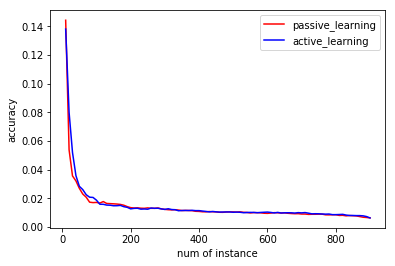

In [11]:
import matplotlib.pyplot as plt
x=list()
for i in range(90):
    x.append((i+1)*10)

passive_learning=1-pd.DataFrame(passive_test_error).describe().iloc[1,:]
active_learning=1-pd.DataFrame(active_test_error).describe().iloc[1,:]
plt.plot(x,passive_learning,color='red',label='passive_learning')
plt.plot(x,active_learning,color='blue',label='active_learning')
plt.xlabel('num of instance')
plt.ylabel('accuracy')
plt.legend()
plt.show()

(c) Average the test errors for the incrementally trained 90 SVMs in 1(b)i and1(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions.

According to this step, we can see that active learning method performs better than the passive learning method at first. But with the increase of data points in the pool, they perform almost equally finally.